# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [47]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [48]:

competition = pd.read_csv("datasets/competition.csv", index_col=False)


Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

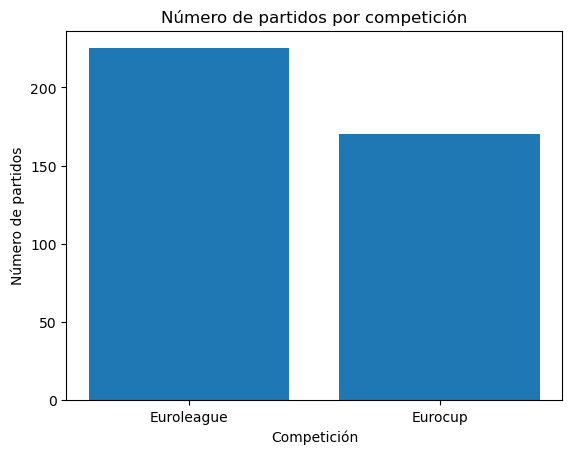

In [49]:
# 1
matches_per_competition = competition['Competition'].value_counts()
plt.bar(matches_per_competition.index, matches_per_competition)

plt.xlabel('Competición')
plt.ylabel('Número de partidos')
plt.title('Número de partidos por competición')
plt.show()

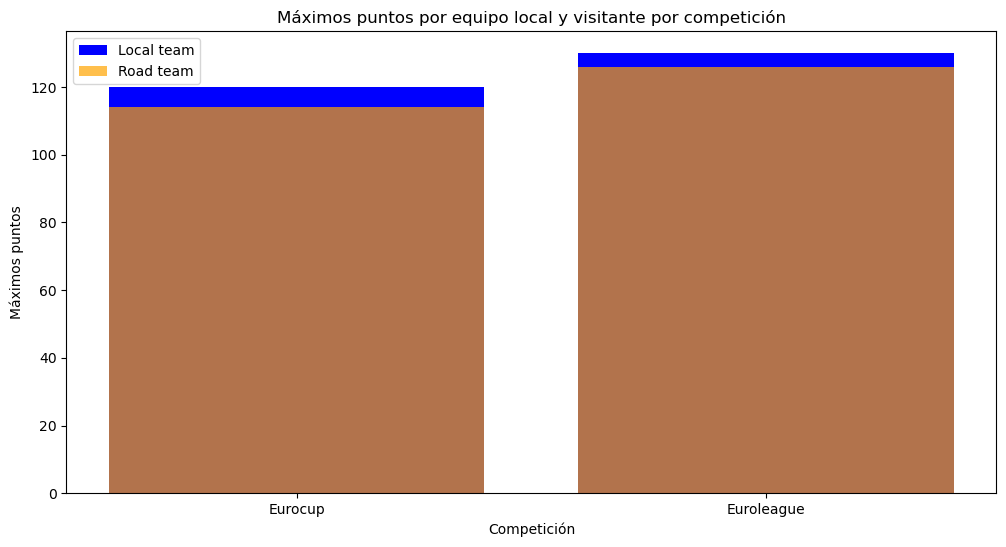

In [50]:
# 2
max_points_local = competition.groupby(['Competition'])['Localscore'].max().reset_index()
max_points_away = competition.groupby(['Competition'])['Roadscore'].max().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(max_points_local['Competition'], max_points_local['Localscore'], color='blue', label='Local team')
plt.bar(max_points_away['Competition'], max_points_away['Roadscore'], color='orange', label='Road team', alpha=0.7)
plt.title('Máximos puntos por equipo local y visitante por competición')
plt.xlabel('Competición')
plt.ylabel('Máximos puntos')
plt.legend()
plt.show()

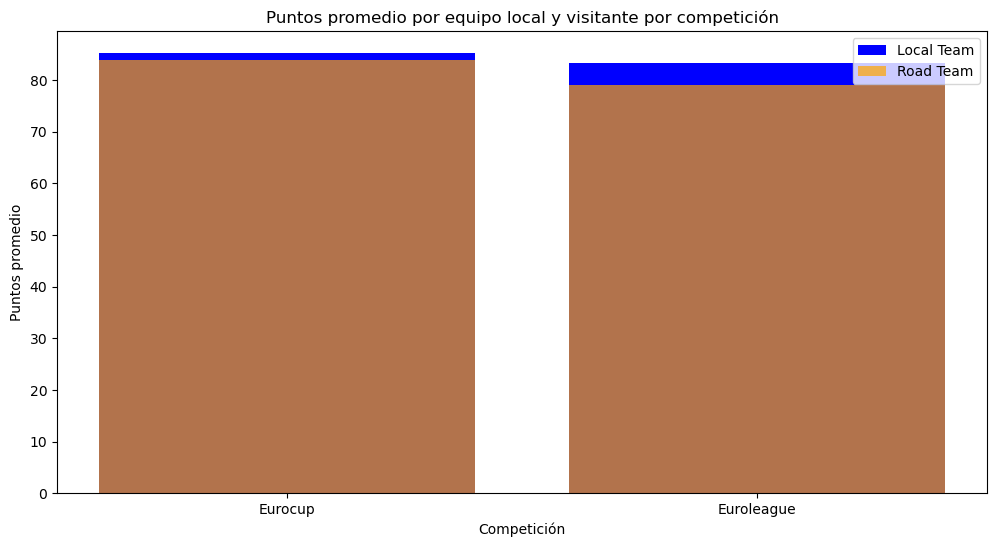

In [51]:
# 3
avg_points_local = competition.groupby(['Competition'])['Localscore'].mean().reset_index()
avg_points_away = competition.groupby(['Competition'])['Roadscore'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(avg_points_local['Competition'], avg_points_local['Localscore'], color='blue', label='Local Team')
plt.bar(avg_points_away['Competition'], avg_points_away['Roadscore'], color='orange', label='Road Team', alpha=0.7)
plt.title('Puntos promedio por equipo local y visitante por competición')
plt.xlabel('Competición')
plt.ylabel('Puntos promedio')
plt.legend()
plt.show()

Máxima diferencia por competición:
Competition
Eurocup       39.0
Euroleague    39.0
Name: Absolute_Plusminus, dtype: float64


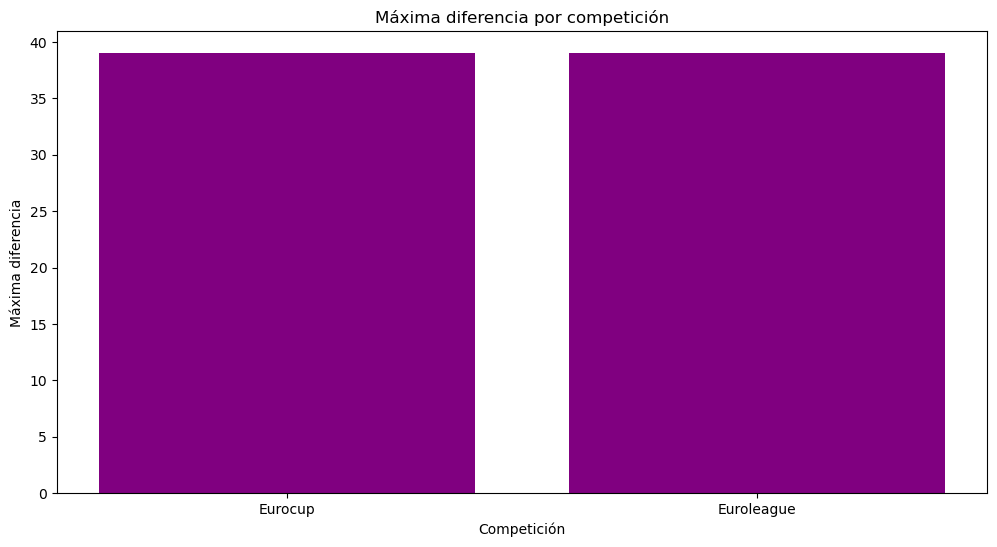

In [52]:
# 4
competition['Absolute_Plusminus'] = np.where(competition['Plusminus'] < 0, -competition['Plusminus'], competition['Plusminus'])
max_difference_by_competition = competition.groupby('Competition')['Absolute_Plusminus'].max()
print("Máxima diferencia por competición:")
print(max_difference_by_competition)

plt.figure(figsize=(12, 6))
plt.bar(max_difference_by_competition.index, max_difference_by_competition, color='purple')
plt.title('Máxima diferencia por competición')
plt.xlabel('Competición')
plt.ylabel('Máxima diferencia')
plt.show()

# no se si es que no lo estoy haciendo mal o es que de verdad es la misma diferencia en ambas competiciones

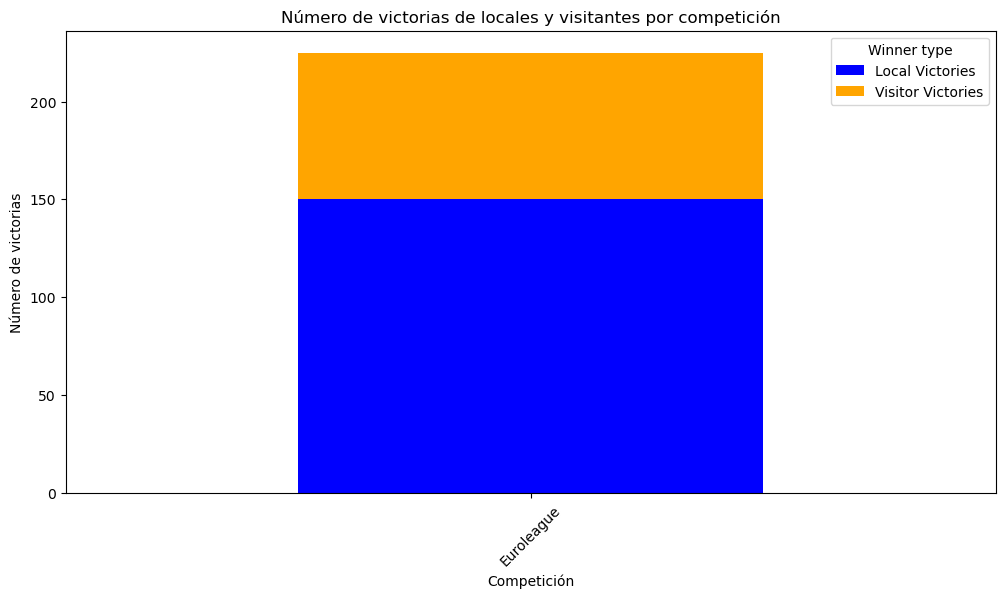

In [60]:
# 5
competition['Winner_Type'] = competition['Ganador'].map({'Local': 'Local Victories', 'Visitante': 'Visitor Victories'})
victories_by_competition = competition.groupby(['Competition', 'Winner_Type']).size().unstack(fill_value=0)

victories_by_competition.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'orange'])
plt.title('Número de victorias de locales y visitantes por competición')
plt.xlabel('Competición')
plt.ylabel('Número de victorias')
plt.legend(title='Winner type')
plt.xticks(rotation=45)
plt.show()

# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

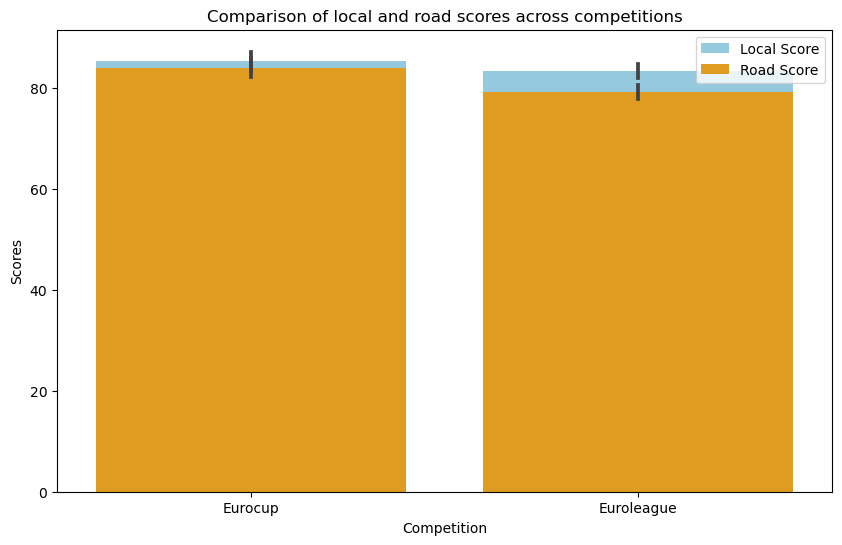

In [54]:
# Comparison Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Competition', y='Localscore', data=competition, color='skyblue', label='Local Score')
sns.barplot(x='Competition', y='Roadscore', data=competition, color='orange', label='Road Score')
plt.title('Comparison of local and road scores across competitions')
plt.xlabel('Competition')
plt.ylabel('Scores')
plt.legend()
plt.show()

**Your comments here**
- Parece que en ambas competiciones marcan mas los equipos locales 
- parece que en la euroliga se suelen anotar menos puntos por lo general

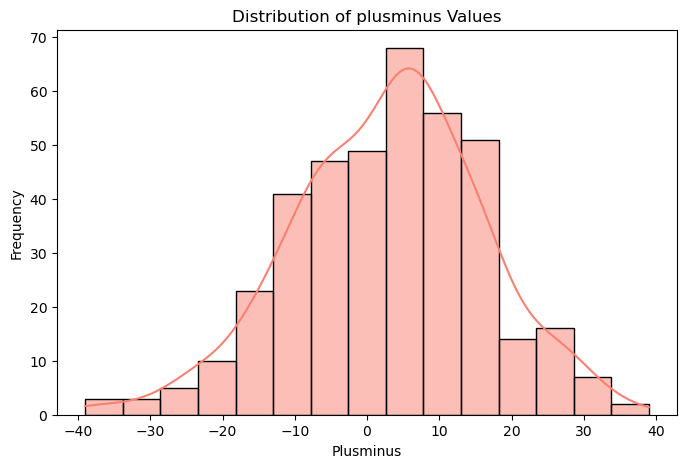

In [55]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(competition['Plusminus'], bins=15, color='salmon', kde=True)
plt.title('Distribution of plusminus Values')
plt.xlabel('Plusminus')
plt.ylabel('Frequency')
plt.show()

**Your comments here**
- El grafico nos enseña la distribucion del plusminus
- Podemos observar que lo mas comun es que el plusminus este a favor de los locales en torno al +8

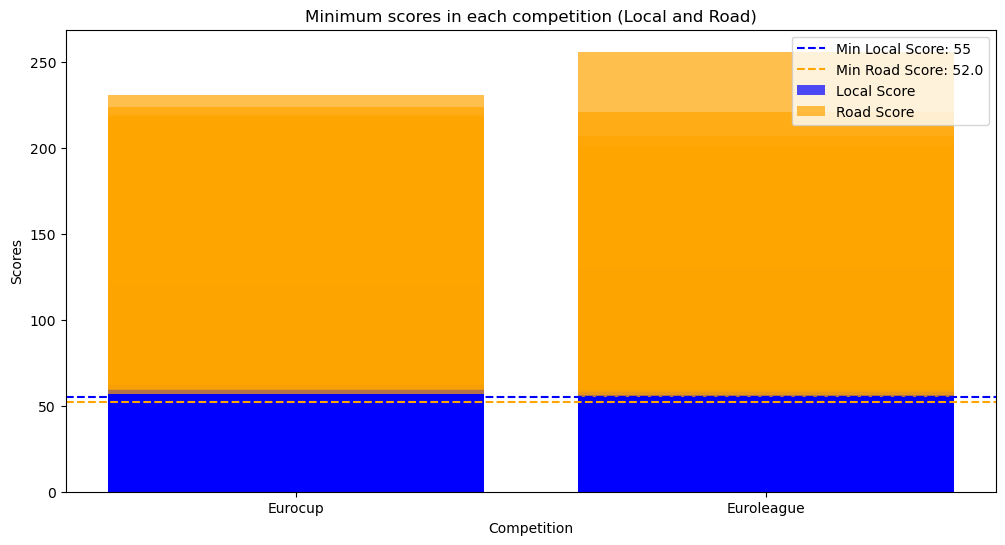

In [56]:
# Stacked columns
min_local_score = competition['Localscore'].min()
min_road_score = competition['Roadscore'].min()

plt.figure(figsize=(12, 6))
plt.bar(competition['Competition'], competition['Localscore'], color='blue', label='Local Score', alpha=0.7)
plt.bar(competition['Competition'], competition['Roadscore'], color='orange', label='Road Score', alpha=0.7, bottom=competition['Localscore'])
plt.axhline(min_local_score, color='blue', linestyle='--', label=f'Min Local Score: {min_local_score}')
plt.axhline(min_road_score, color='orange', linestyle='--', label=f'Min Road Score: {min_road_score}')

plt.title('Minimum scores in each competition (Local and Road)')
plt.xlabel('Competition')
plt.ylabel('Scores')
plt.legend()
plt.show()

**Your comments here**
- Aquí podemos ver en vez de los maximos anotadores, los partidos con menos anotaciones
- De esta manera podemos confirmar que por lo general los visitantes anotan menos

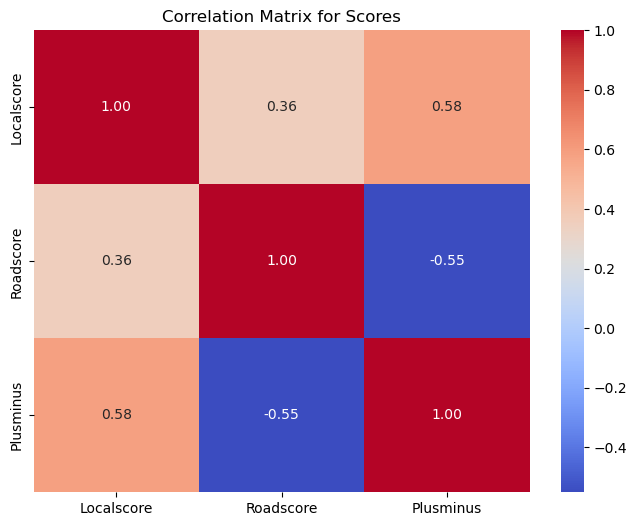

In [57]:
# Correlation / Heatmap
correlation_matrix = competition[['Localscore', 'Roadscore', 'Plusminus']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Scores')
plt.show()

**Your comments here**
- Este heatmap nos ayuda a identificar las relaciones entre los plusminus y los distintos equipos en local y visitante
- Aquí se hace más visible que el equipo visitante suele perder ya que el plusminus es negativo por lo general

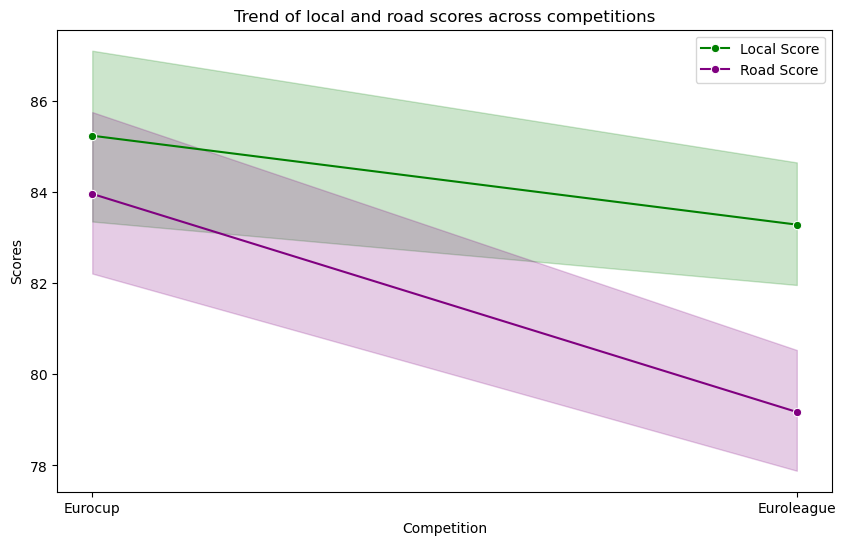

In [58]:
# Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Competition', y='Localscore', data=competition, marker='o', color='green', label='Local Score')
sns.lineplot(x='Competition', y='Roadscore', data=competition, marker='o', color='purple', label='Road Score')
plt.title('Trend of local and road scores across competitions')
plt.xlabel('Competition')
plt.ylabel('Scores')
plt.legend()
plt.show()

**Your comments here**
- aquí comparamos otra vez Eurocopa y Euroliga 
- Aqui se puede ver de manera muy sencilla que la diferencia entre equipos locales y visitantes en la Euroliga es muy notable de mientras que en la Eurocopa se mantiene bastante similar, con poco dispersión